In [1]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm

In [2]:
import pandas as pd
dataset = pd.read_csv("Training.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset.iloc[:,0:600]
Y = dataset.iloc[:,600]

#normalize the data
scaler = Normalizer().fit(X)
X = scaler.transform(X)
len(dataset)
#dataset[0]
type(dataset)

pandas.core.frame.DataFrame

In [3]:
traindata, testdata, trainlabel, testlabel = train_test_split(X, Y, test_size=0.33, random_state=42)
expected = testlabel

In [4]:
print("-----------------------------------------LR---------------------------------")
model = LogisticRegression()
model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
predicted = model.predict(testdata)

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="binary")
precision = precision_score(y_train1, y_pred , average="binary")
f1 = f1_score(y_train1, y_pred, average="binary")

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)


-----------------------------------------LR---------------------------------
accuracy
0.804
precision
0.804
racall
1.000
f1score
0.891


accuracy
0.804
precision
0.804
recall
1.000
f1score
0.891


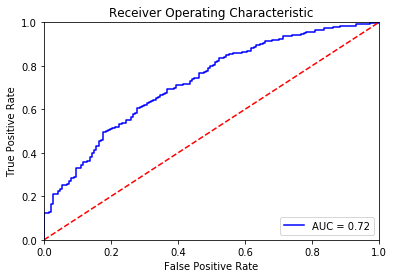

In [5]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(expected,predicted).ravel()
tp=float(tp)
fp=float(fp)
fn=float(fn)
tn=float(tn)

accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = (tp/(tp+fp))
recall=tp/(fn+tp)
f1=2*precision*recall/(precision+recall)

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("recall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)



probs = model.predict_proba(testdata)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(testlabel, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#confusion_matrix(predicted,expected)





In [6]:
# fit a Naive Bayes model to the data
print("-----------------------------------------NB---------------------------------")
model = GaussianNB()
model.fit(traindata, trainlabel)
print(model)
# make predictions
expected = testlabel
predicted = model.predict(testdata)

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="binary")
precision = precision_score(y_train1, y_pred , average="binary")
f1 = f1_score(y_train1, y_pred, average="binary")

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

-----------------------------------------NB---------------------------------
GaussianNB(priors=None)
accuracy
0.592
precision
0.884
racall
0.567
f1score
0.691


accuracy
0.592
precision
0.884
recall
0.567
f1score
0.691


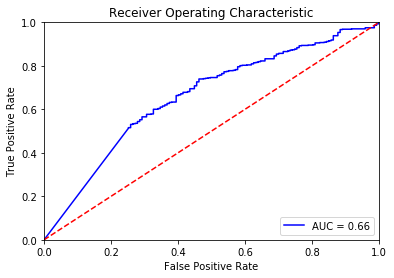

In [7]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(expected,predicted).ravel()
tp=float(tp)
fp=float(fp)
fn=float(fn)
tn=float(tn)

accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = (tp/(tp+fp))
recall=tp/(fn+tp)
f1=2*precision*recall/(precision+recall)

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("recall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

probs = model.predict_proba(testdata)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(testlabel, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




In [8]:
# fit a k-nearest neighbor model to the data
print("-----------------------------------------KNN---------------------------------")
model = KNeighborsClassifier()
model.fit(traindata, trainlabel)
print(model)
# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="binary")
precision = precision_score(y_train1, y_pred , average="binary")
f1 = f1_score(y_train1, y_pred, average="binary")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

-----------------------------------------KNN---------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
----------------------------------------------
accuracy
0.792
precision
0.845
racall
0.907
f1score
0.875


accuracy
0.792
precision
0.845
recall
0.907
f1score
0.875


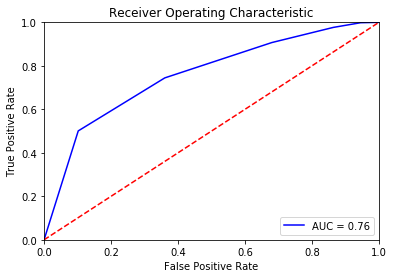

In [9]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(expected,predicted).ravel()
tp=float(tp)
fp=float(fp)
fn=float(fn)
tn=float(tn)

accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = (tp/(tp+fp))
recall=tp/(fn+tp)
f1=2*precision*recall/(precision+recall)

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("recall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

probs = model.predict_proba(testdata)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(testlabel, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [10]:
print("-----------------------------------------DT---------------------------------")

model = DecisionTreeClassifier()
model.fit(traindata, trainlabel)
print(model)
# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="binary")
precision = precision_score(y_train1, y_pred , average="binary")
f1 = f1_score(y_train1, y_pred, average="binary")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)


-----------------------------------------DT---------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
----------------------------------------------
accuracy
0.751
precision
0.850
racall
0.837
f1score
0.844


accuracy
0.751
precision
0.850
recall
0.837
f1score
0.844


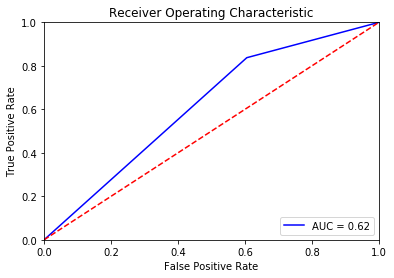

In [11]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(expected,predicted).ravel()
tp=float(tp)
fp=float(fp)
fn=float(fn)
tn=float(tn)

accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = (tp/(tp+fp))
recall=tp/(fn+tp)
f1=2*precision*recall/(precision+recall)

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("recall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

probs = model.predict_proba(testdata)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(testlabel, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [12]:
print("-----------------------------------------Adaboost---------------------------------")

model = AdaBoostClassifier(n_estimators=100)
model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="binary")
precision = precision_score(y_train1, y_pred , average="binary")
f1 = f1_score(y_train1, y_pred, average="binary")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)


-----------------------------------------Adaboost---------------------------------
----------------------------------------------
accuracy
0.828
precision
0.868
racall
0.927
f1score
0.897


accuracy
0.828
precision
0.868
recall
0.927
f1score
0.897


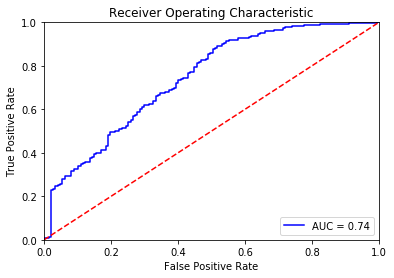

In [13]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(expected,predicted).ravel()
tp=float(tp)
fp=float(fp)
fn=float(fn)
tn=float(tn)

accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = (tp/(tp+fp))
recall=tp/(fn+tp)
f1=2*precision*recall/(precision+recall)

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("recall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

probs = model.predict_proba(testdata)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(testlabel, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [14]:
model = RandomForestClassifier(n_estimators=100)
model = model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model

print("--------------------------------------RF--------------------------------------")

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="binary")
precision = precision_score(y_train1, y_pred , average="binary")
f1 = f1_score(y_train1, y_pred, average="binary")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

--------------------------------------RF--------------------------------------
----------------------------------------------
accuracy
0.852
precision
0.862
racall
0.972
f1score
0.913


accuracy
0.852
precision
0.862
recall
0.972
f1score
0.913


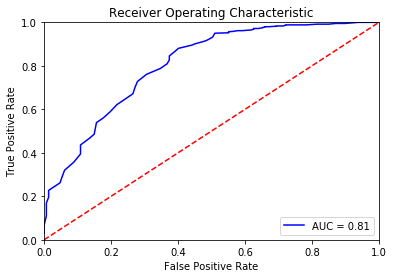

In [15]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(expected,predicted).ravel()
tp=float(tp)
fp=float(fp)
fn=float(fn)
tn=float(tn)

accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = (tp/(tp+fp))
recall=tp/(fn+tp)
f1=2*precision*recall/(precision+recall)

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("recall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

probs = model.predict_proba(testdata)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(testlabel, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [16]:
model = svm.SVC(kernel='rbf',probability=True)
model = model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
predicted = model.predict(testdata)
print("--------------------------------------SVMrbf--------------------------------------")
y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="binary")
precision = precision_score(y_train1, y_pred , average="binary")
f1 = f1_score(y_train1, y_pred, average="binary")

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)


--------------------------------------SVMrbf--------------------------------------
accuracy
0.804
precision
0.804
racall
1.000
f1score
0.891


accuracy
0.804
precision
0.804
recall
1.000
f1score
0.891


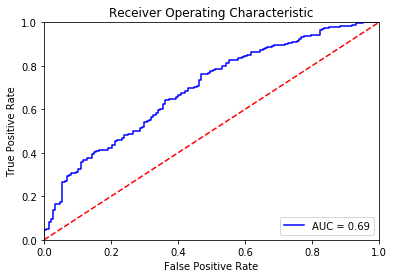

In [17]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(expected,predicted).ravel()
tp=float(tp)
fp=float(fp)
fn=float(fn)
tn=float(tn)

accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = (tp/(tp+fp))
recall=tp/(fn+tp)
f1=2*precision*recall/(precision+recall)

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("recall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

probs = model.predict_proba(testdata)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(testlabel, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [18]:
model = svm.SVC(kernel='linear', C=1000, probability=True)
model.fit(traindata, trainlabel)
print(model)
# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model
print("--------------------------------------SVM linear--------------------------------------")
y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="binary")
precision = precision_score(y_train1, y_pred , average="binary")
f1 = f1_score(y_train1, y_pred, average="binary")

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
--------------------------------------SVM linear--------------------------------------
accuracy
0.741
precision
0.861
racall
0.809
f1score
0.834


accuracy
0.741
precision
0.861
recall
0.809
f1score
0.834


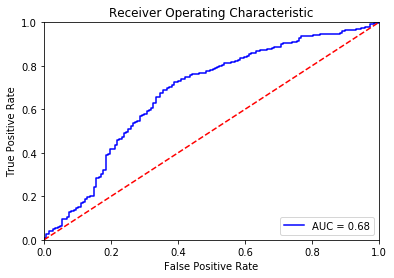

In [19]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(expected,predicted).ravel()
tp=float(tp)
fp=float(fp)
fn=float(fn)
tn=float(tn)

accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = (tp/(tp+fp))
recall=tp/(fn+tp)
f1=2*precision*recall/(precision+recall)

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("recall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

probs = model.predict_proba(testdata)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(testlabel, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

